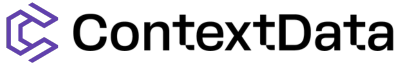

Introducing VectorETL by [ContextData](https://contextdata.ai)

VectorETL is a no-code framework which allows developers to easily:

*   Extract data from multiple sources (e.g. Databases, Object storage, Operational Systems)
*   Convert the data to vector embeddings
*   Write the embeddings to all major vector databases (including Weaviate)

...all using a config file

For this demo, we're using Weaviate version `1.25.10`, Weaviate python client `4.7.1` and VectorETL `0.1.6.2`.

Author: Jide Ogunjobi ([Twitter](https://x.com/jide_o1) | [LinkedIn](https://www.linkedin.com/in/jide-o-87602512/))

Context Data: ([Website](https://contextdata.ai/) | [Twitter](https://x.com/1contextdata) | [LinkedIn](https://www.linkedin.com/company/1contextdata))



In [ ]:
!pip install vector-etl --upgrade --quiet

The configuration file format requires

1.   `source`: Specifies the data source details
2.   `embedding`: Defines the embedding model to be used
3.   `target`: Outlines the target vector database
4.   `embed_columns`: Defines the columns that need to be embedded (mainly for structured data sources)

Once you have the file configured, run the `vector-etl` command and pass the absolute path to your configuration file.

**We have provided a sample configuration file for you. All you need to do is update the credentials and run the cell below.**

See the examples directory for more sample configurations

You can also view the documentation [here](https://vectoretl.contextdata.dev/configuration.html)

<sub><sup>* Sample csv files retrieved from [here](https://github.com/datablist/sample-csv-files)</sup></sub>

In [4]:
!vector-etl -c /path/to/config.yaml #make sure this is a full absolute path

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_config.py:341: UserWarning: Valid config keys have changed in V2:
* 'allow_population_by_field_name' has been renamed to 'populate_by_name'
* 'smart_union' has been removed
  warnings.warn(message, UserWarning)
INFO:vector_etl.orchestrator:Starting ETL process...
INFO:vector_etl.orchestrator:Fetching data from Local File...
INFO:vector_etl.source_mods.file_loader:Fetching data from files...
INFO:vector_etl.source_mods.local_file:Listing files in . matching pattern customers-100.csv
INFO:vector_etl.source_mods.local_file:Filename: .config
INFO:vector_etl.source_mods.local_file:Filename: config.yaml
INFO:vector_etl.source_mods.local_file:Filename: customers-100.csv
INFO:vector_etl.source_mods.local_file:Filename: sample_data
INFO:vector_etl.source_mods.local_file:Copying file(s) to local directory...
INFO:vector_etl.source_mods.file_loader:Splitting dataframe into chunks...
INFO:vector_etl.orchestrator:Processing and embedding d

### **Data Retrieval**

Now that the data has been written to the Weaviate Database, let's query the collection to confirm that the data was written correctly

In [5]:
import weaviate
import yaml

In [9]:
#import the config file to a variable

with open('/path/to/config.yaml', 'r') as file:
  config = yaml.safe_load(file)

In [13]:
#Connect to the Weaviate cluster

client = weaviate.Client(
    url=config["target"]["weaviate_url"],
    auth_client_secret=weaviate.AuthApiKey(api_key=config["target"]["weaviate_api_key"]),
    additional_headers={
        "X-OpenAI-Api-Key": config["embedding"]["api_key"]
    }
)

In [19]:
#Query the Weaviate collection

query_result = client.query.get("Customers", ["firstName", "lastName", "email"]).with_limit(5).do()
query_result['data']['Get']['Customers']

[{'email': 'chloelester@higgins-wilkinson.com',
  'firstName': 'Kathleen',
  'lastName': 'Mckay'},
 {'email': 'justinwalters@jimenez.com',
  'firstName': 'Chad',
  'lastName': 'Davidson'},
 {'email': 'kristiwhitney@bernard.com',
  'firstName': 'Eddie',
  'lastName': 'Jimenez'},
 {'email': 'blanchardbob@wallace-shannon.com',
  'firstName': 'Kiara',
  'lastName': 'Houston'},
 {'email': 'donnamullins@norris-barrett.org',
  'firstName': 'Marcus',
  'lastName': 'Moody'}]